In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def model(x, w, b):  # Our Linear Regression Model i.e: f(x) = x*w + b
    pred_value = np.dot(x, w) + b
    return pred_value

def evaluate_cost(x, y, w, b):  # Evaluating cost for current weights and biases. J(w,b) = 1/2m(sigma(f(x[i])-y[i])^2)
    values = (model(x, w, b) - y )**2
    c = np.sum(values)
    c = c/(2*len(x))
    return c

In [5]:
X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])
b_init = 785.1811367994083
w_init = np.array([0.39133535, 18.75376741, -53.36032453, -26.42131618])

c = evaluate_cost(X_train, y_train, w_init, b_init)
print(f"Cost of the model for initial optimal values of w and b: {c}")

Cost of the model for initial optimal values of w and b: 1.5578904045996674e-12


In [25]:
#  Compute gradient for Multiple Parameters
def compute_gradient(x, y, w, b):
    m = x.shape[0]
    model_val = model(x, w, b)
    err = model_val - y
    w_derivatives = np.dot(err, x)
    w_derivatives /= m
    b_derivative = np.sum(err) / m
    return w_derivatives, b_derivative

#  Applying Gradient Descent to find minimum cost model, i.e the values of w,b for which model line will best fit
def gradient_descent(x, y, w, b, alpha, itr): 
    j_hist = []
    for _ in range(itr):
        j_hist.append(evaluate_cost(x, y, w, b))
        tmp_w, tmp_b = compute_gradient(x, y, w, b)
        w = w - (alpha*tmp_w)
        b = b - (alpha*tmp_b)
        
    return w, b, j_hist

In [38]:
w = np.zeros_like(w_init)
b = 0.
alpha = 5.0e-10
itr = 10000
w, b , j_hist= gradient_descent(X_train, y_train, w, b, alpha, itr)

<function matplotlib.pyplot.show(close=None, block=None)>

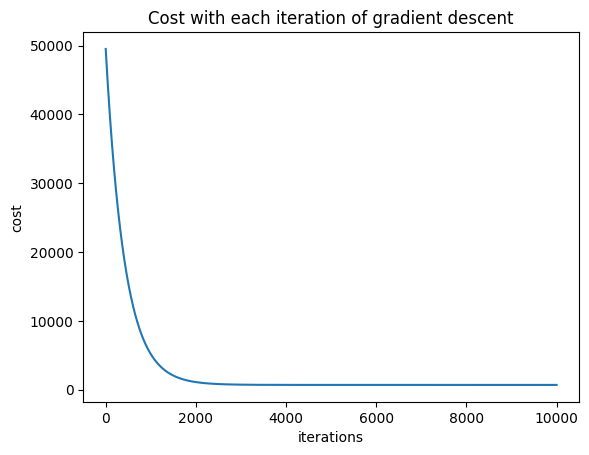

In [43]:
plt.plot(j_hist)
plt.title("Cost with each iteration of gradient descent")
plt.xlabel("iterations")
plt.ylabel("cost")
plt.show

In [40]:
print(w, b)
print(evaluate_cost(X_train, y_train, w, b))

[2.02183374e-01 4.98188592e-04 4.85538131e-05 4.39073886e-03] 9.934451997874159e-05
696.9718683576688


In [41]:
print(model(X_train[2], w, b))

172.41505464157567
